In [30]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import tensorflow as tf 
import keras
from keras import layers

In [50]:
img_folder = "captchas"
EPOCHS = 200

In [51]:
df = pd.read_csv('labels.csv', header=None, encoding='utf-8', delimiter=';', names=['text', 'filename'])

data = {row.text: row.filename for row in df.itertuples()}

input = data
characters = sorted(set(''.join(data.keys())))
char_to_num = {v: i for i, v in enumerate(characters)}

num_to_char = {str(i): v for i, v in enumerate(characters)}
num_to_char['-1'] = 'UKN'

print(num_to_char)

{'0': '2', '1': '4', '2': '5', '3': '6', '4': '7', '5': '9', '6': 'а', '7': 'г', '8': 'д', '9': 'е', '10': 'ж', '11': 'к', '12': 'л', '13': 'м', '14': 'о', '15': 'р', '16': 'с', '17': 'т', '18': 'у', '19': 'ф', '20': 'х', '21': 'ш', '22': 'ю', '23': 'я', '-1': 'UKN'}


In [52]:
from PIL import Image
import glob

files = glob.glob("captchas/*.png")

for file in files:
    print(file)
    img = Image.open(file)
    resize_img = img.resize((200, 60))    
    resize_img.save(file)


captchas\д22ж2.png
captchas\д22жф.png
captchas\д22кж.png
captchas\д22сш.png
captchas\д22ш.png
captchas\д252ф.png
captchas\д25д.png
captchas\д272ш.png
captchas\д275ж.png
captchas\д27д.png
captchas\д27ж.png
captchas\д27рф.png
captchas\д27ф.png
captchas\д27ш.png
captchas\д27шм.png
captchas\д2ад.png
captchas\д2аж.png
captchas\д2асш.png
captchas\д2аш.png
captchas\д2д2.png
captchas\д2д2т.png
captchas\д2д2х.png
captchas\д2д5.png
captchas\д2д7.png
captchas\д2д7у.png
captchas\д2да.png
captchas\д2дае.png
captchas\д2дд.png
captchas\д2дду.png
captchas\д2дес.png
captchas\д2джк.png
captchas\д2джх.png
captchas\д2дк.png
captchas\д2дре.png
captchas\д2дрх.png
captchas\д2дс7.png
captchas\д2дт.png
captchas\д2дф.png
captchas\д2дфф.png
captchas\д2дфш.png
captchas\д2дшд.png
captchas\д2дшж.png
captchas\д2ед.png
captchas\д2ед2.png
captchas\д2еда.png
captchas\д2еж.png
captchas\д2ежд.png
captchas\д2ежф.png
captchas\д2еф.png
captchas\д2ехд.png
captchas\д2ешр.png
captchas\д2ешх.png
captchas\д2ж5.png
captchas\д2ж7.

KeyboardInterrupt: 

In [53]:
max_len = len(max(os.listdir("captchas"), key=len)) - 4

In [54]:
def compute_perf_metric(predictions, groundtruth):
    if predictions.shape == groundtruth.shape:
        return np.sum(predictions == groundtruth)/(predictions.shape[0]*predictions.shape[1])
    else:
        raise ValueError()

In [55]:
def encode_single_sample(filename):
    img_path = os.path.join(img_folder, filename)
    img = tf.io.read_file(img_path)

    try:
      img = tf.io.decode_png(img, channels=3)
    except Exception as e:
      print(img_path)
      raise e

    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.transpose(img, perm=[1, 0, 2])

    return img.numpy()

def create_train_and_validation_datasets():
    X, y = [],[]

    items = list(input.items())
    print(items)
    train_dataset = items
    test_dataset = items[12000:-1]
    
    y, X = zip(*train_dataset)

    y = list(y)
    y.sort(key=len)
    print(y)
    X = np.asarray(list(map(encode_single_sample, X)))
    y = [list(map(lambda x:char_to_num[x], label)) for label in y]
    y = tf.keras.preprocessing.sequence.pad_sequences(y, max_len, padding='post', value=-1)
    y = np.asarray(y)

    print(X.shape)
    print(y.shape)
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=42)
    return X_train, X_val, y_train, y_val, test_dataset

In [56]:
X_train, X_val, y_train, y_val, test_dataset = create_train_and_validation_datasets()

print(X_train.shape, X_val.shape)
fig=plt.figure(figsize=(20, 10))
fig.add_subplot(2, 4, 1)
plt.imshow(X_train[0], cmap='gray')
plt.title('Image from X_train with label '+ str(y_train[0]))
plt.axis('off')
fig.add_subplot(2, 4, 2)
plt.imshow(X_train[135], cmap='gray')
plt.title('Image from X_train with label '+ str(y_train[135]))
plt.axis('off')
fig.add_subplot(2, 4, 3)
plt.imshow(X_val[0], cmap='gray')
plt.title('Image from X_val with label '+ str(y_val[0]))
plt.axis('off')
fig.add_subplot(2, 4, 4)
plt.imshow(X_val[23], cmap='gray')
plt.title('Image from X_val with label '+ str(y_val[23]))
plt.axis('off')

[('д22ж2', 'д22ж2.png'), ('д22жф', 'д22жф.png'), ('д22кж', 'д22кж.png'), ('д22сш', 'д22сш.png'), ('д22ш', 'д22ш.png'), ('д252ф', 'д252ф.png'), ('д25д', 'д25д.png'), ('д272ш', 'д272ш.png'), ('д275ж', 'д275ж.png'), ('д27д', 'д27д.png'), ('д27ж', 'д27ж.png'), ('д27рф', 'д27рф.png'), ('д27ф', 'д27ф.png'), ('д27ш', 'д27ш.png'), ('д27шм', 'д27шм.png'), ('д2ад', 'д2ад.png'), ('д2аж', 'д2аж.png'), ('д2асш', 'д2асш.png'), ('д2аш', 'д2аш.png'), ('д2д2', 'д2д2.png'), ('д2д2т', 'д2д2т.png'), ('д2д2х', 'д2д2х.png'), ('д2д5', 'д2д5.png'), ('д2д7', 'д2д7.png'), ('д2д7у', 'д2д7у.png'), ('д2да', 'д2да.png'), ('д2дае', 'д2дае.png'), ('д2дд', 'д2дд.png'), ('д2дду', 'д2дду.png'), ('д2дес', 'д2дес.png'), ('д2джк', 'д2джк.png'), ('д2джх', 'д2джх.png'), ('д2дк', 'д2дк.png'), ('д2дре', 'д2дре.png'), ('д2дрх', 'д2дрх.png'), ('д2дс7', 'д2дс7.png'), ('д2дт', 'д2дт.png'), ('д2дф', 'д2дф.png'), ('д2дфф', 'д2дфф.png'), ('д2дфш', 'д2дфш.png'), ('д2дшд', 'д2дшд.png'), ('д2дшж', 'д2дшж.png'), ('д2ед', 'д2ед.png'), ('д

InvalidArgumentError: {{function_node __wrapped__DecodePng_device_/job:localhost/replica:0/task:0/device:CPU:0}} Invalid PNG. Failed to initialize decoder. [Op:DecodePng] name: 

In [59]:
def resize_and_normalize(img):
    img = tf.image.resize(img, (200, 60))
    img = tf.image.convert_image_dtype(img, tf.float32)
    return img

In [60]:
def encode_single_sample(filename):
    img_path = os.path.join(img_folder, filename)
    img = tf.io.read_file(img_path)

    try:
        img = tf.io.decode_png(img, channels=3)
    except Exception as e:
        print(img_path)
        raise e

    img = resize_and_normalize(img)

    return img.numpy()

In [61]:
class CTCLayer(layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
        input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        labels_mask = 1 - tf.cast(tf.equal(y_true, -1), dtype="int64")
        labels_length = tf.reduce_sum(labels_mask, axis=1)
        loss = self.loss_fn(y_true, y_pred, input_length, tf.expand_dims(labels_length, -1))
        self.add_loss(loss)

        return y_pred

def build_model():
    input_img = layers.Input(shape=(200,60,3), name="image", dtype="float32") 
    labels = layers.Input(name="label", shape=(max_len, ), dtype="float32")

    x = layers.Conv2D(32,(3, 3),activation="relu",kernel_initializer="he_normal",padding="same",name="Conv1")(input_img)
    x = layers.MaxPooling2D((2, 2), name="pool1")(x)

    x = layers.Conv2D(64,(3, 3),activation="relu",kernel_initializer="he_normal",padding="same",name="Conv2")(x)
    x = layers.MaxPooling2D((2, 2), name="pool2")(x)

    x = layers.Reshape(target_shape=(50, 960), name="reshape")(x)
    x = layers.Dense(64, activation="relu", name="dense1")(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.25))(x)
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.25))(x)
    x = layers.Dense(len(characters)+1, activation="softmax", name="dense2")(x)

    output = CTCLayer(name="ctc_loss")(labels, x)

    model = keras.models.Model(inputs=[input_img, labels], outputs=output, name="ocr_cnn_lstm_model")
    
    model.compile(optimizer=keras.optimizers.Adam())
    return model

In [62]:
model = build_model()
model.summary()

Model: "ocr_cnn_lstm_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 image (InputLayer)          [(None, 200, 60, 3)]         0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 200, 60, 32)          896       ['image[0][0]']               
                                                                                                  
 pool1 (MaxPooling2D)        (None, 100, 30, 32)          0         ['Conv1[0][0]']               
                                                                                                  
 Conv2 (Conv2D)              (None, 100, 30, 64)          18496     ['pool1[0][0]']               
                                                                                 

In [63]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.map(lambda x, y: {'image': resize_and_normalize(x), 'label': y}).batch(16).prefetch(buffer_size=tf.data.AUTOTUNE)

validation_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
validation_dataset = validation_dataset.map(lambda x, y: {'image': resize_and_normalize(x), 'label': y}).batch(16).prefetch(buffer_size=tf.data.AUTOTUNE)

In [64]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
model_checkpoint = keras.callbacks.ModelCheckpoint("best_model.h5", monitor="val_loss", save_best_only=True)
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=EPOCHS, callbacks=[early_stopping, model_checkpoint])

Epoch 1/200
709/709 [==============================] - 60s 76ms/step - loss: 13.4709 - val_loss: 12.6275
Epoch 2/200
709/709 [==============================] - 52s 74ms/step - loss: 12.3988 - val_loss: 12.2368
Epoch 3/200
709/709 [==============================] - 52s 73ms/step - loss: 12.2973 - val_loss: 12.1781
Epoch 4/200
709/709 [==============================] - 52s 74ms/step - loss: 12.2370 - val_loss: 12.1391
Epoch 5/200
709/709 [==============================] - 52s 74ms/step - loss: 12.2095 - val_loss: 12.1229
Epoch 6/200
709/709 [==============================] - 51s 72ms/step - loss: 12.2014 - val_loss: 12.1189
Epoch 7/200
709/709 [==============================] - 51s 73ms/step - loss: 12.1946 - val_loss: 12.1100
Epoch 8/200
709/709 [==============================] - 52s 73ms/step - loss: 12.1829 - val_loss: 12.0404
Epoch 9/200
709/709 [==============================] - 51s 73ms/step - loss: 12.0884 - val_loss: 11.9714
Epoch 10/200
709/709 [==============================] -

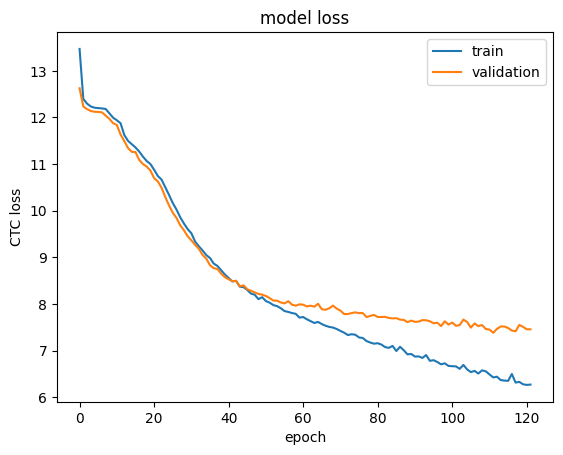

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('CTC loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [66]:
prediction_model = keras.models.Model(
    model.get_layer(name="image").input, model.get_layer(name="dense2").output
)
prediction_model.summary()
prediction_model.save("model.h5")

def get_model(path):
    model = keras.models.load_model(path)
    return model

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 200, 60, 3)]      0         
                                                                 
 Conv1 (Conv2D)              (None, 200, 60, 32)       896       
                                                                 
 pool1 (MaxPooling2D)        (None, 100, 30, 32)       0         
                                                                 
 Conv2 (Conv2D)              (None, 100, 30, 64)       18496     
                                                                 
 pool2 (MaxPooling2D)        (None, 50, 15, 64)        0         
                                                                 
 reshape (Reshape)           (None, 50, 960)           0         
                                                                 
 dense1 (Dense)              (None, 50, 64)            6150

In [67]:
m = get_model("model.h5")
y_pred = m.predict(X_val)
y_pred = keras.backend.ctc_decode(y_pred, input_length=np.ones(X_val.shape[0])*50, greedy=True)
y_pred = y_pred[0][0][0:X_val.shape[0],0:max_len].numpy()

40/40 [==============================] - 3s 42ms/step


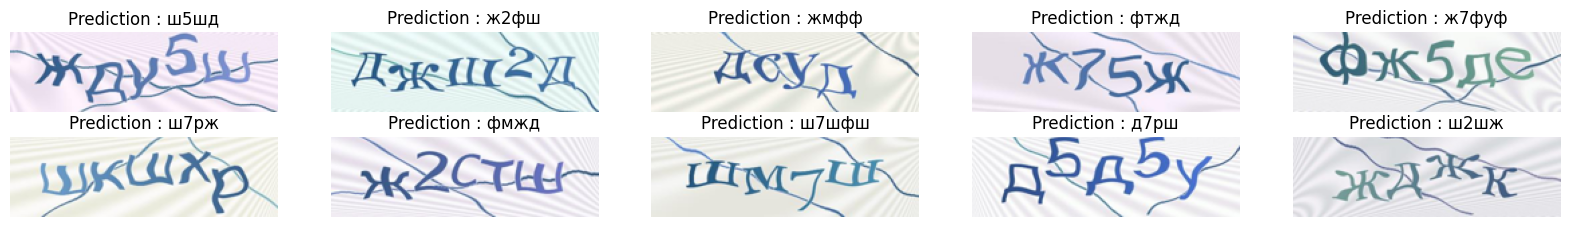

In [68]:
nrow = 1
fig=plt.figure(figsize=(20, 5))
for i in range(0,10):
    if i>4: nrow = 2
    fig.add_subplot(nrow, 5, i+1)
    plt.imshow(X_val[i].transpose((1,0,2)),cmap='gray')
    pred_txt = ''.join(list(map(lambda x:num_to_char[str(x)] if x>-1 else '', y_pred[i])))
    plt.title('Prediction : ' + pred_txt)
    plt.axis('off')
plt.show()  

In [69]:
compute_perf_metric(y_pred, y_val)

0.6262225746761829